In [1]:
# pip install autokeras

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [14]:
blind = training_data[training_data['WELL'] == '25/10-10  Balder Triassic']
training_data = training_data[training_data['WELL'] != '25/10-10  Balder Triassic']

In [15]:
blind['Facies'].unique()

array([6, 5, 7, 4])

In [16]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [17]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,7.120582,2.068850,0.441895,2.445272,0.444403,2727.514574
std,352.014203,229.875939,42.531395,3.544087,7.905972,0.455715,0.151514,0.456893,806.463487
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,947.532465,428.624351,57.623103,5.000000,0.206353,0.152812,2.360203,0.154191,2068.077698
50%,1122.756091,580.014596,80.286850,6.000000,0.282810,0.397062,2.474200,0.406591,2637.434326
75%,1250.394469,678.348782,105.959152,10.000000,0.354700,0.678576,2.558000,0.691040,3224.223145
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [19]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

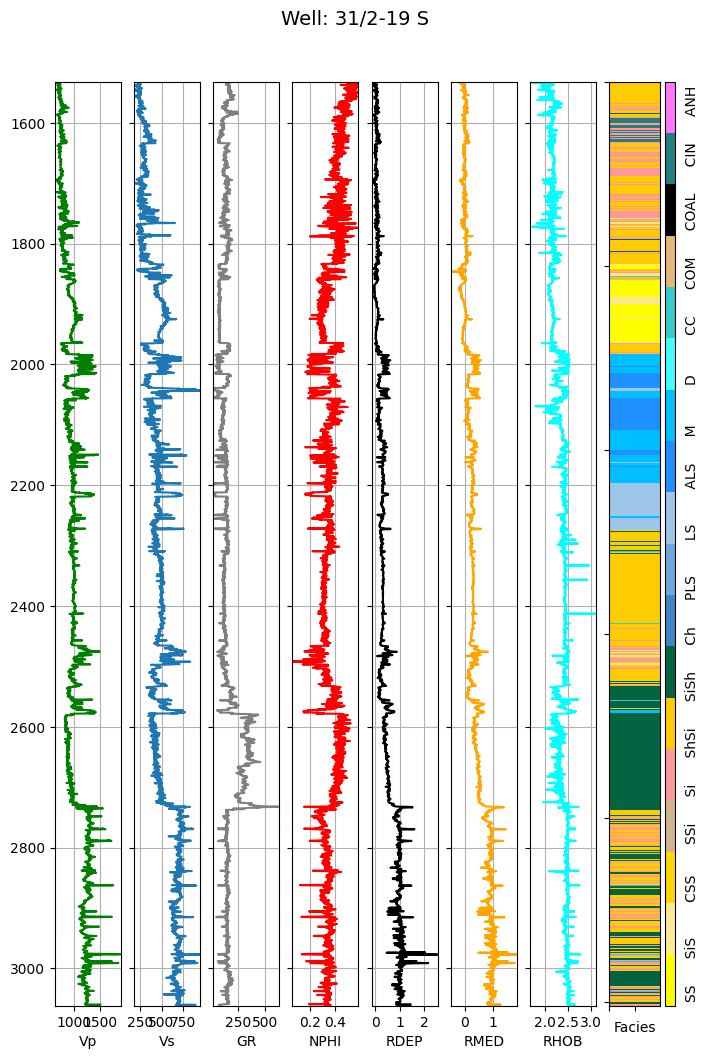

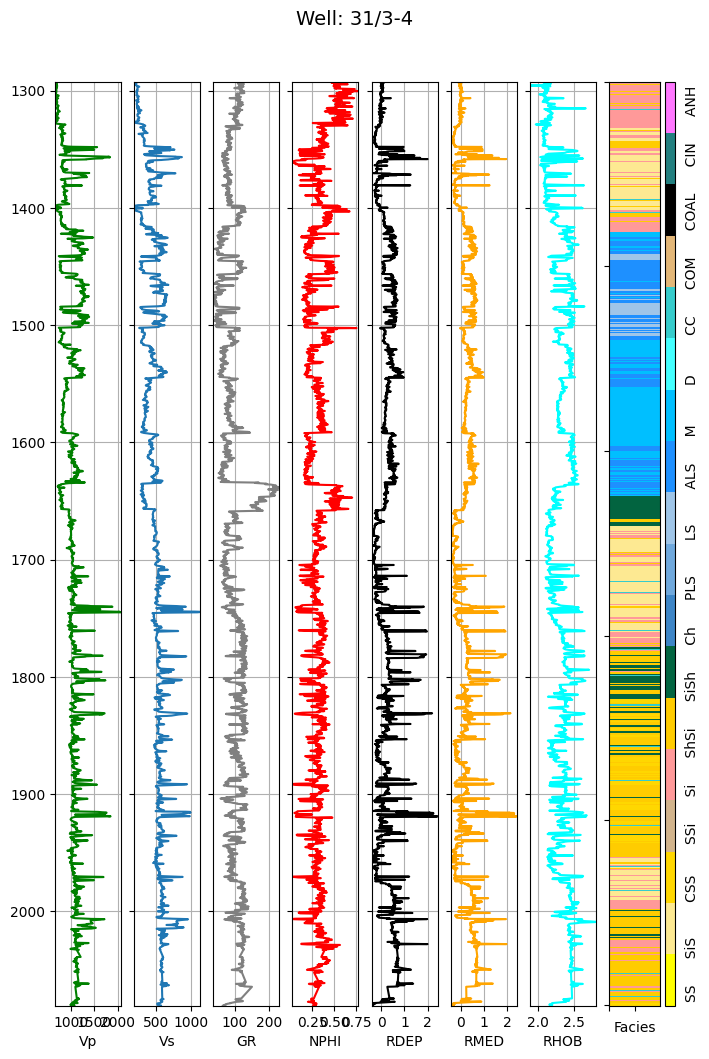

In [20]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/3-4'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      5783
Si      31375
ShSi    36398
SiSh    25752
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

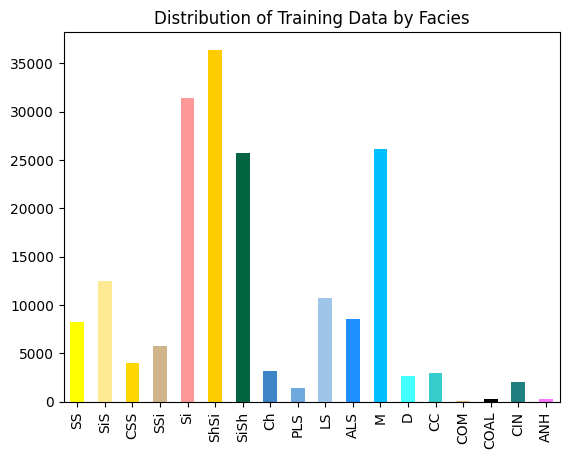

In [21]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [22]:
# correct_labels = training_data['Facies'].values
# correct_labels = training_data[['Vp','Vs']].values
correct_labels = training_data['Vs'].values
correct_labels

feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,84.603521,2.068850,0.441895,2.445272,0.444403
std,42.531395,7.905972,0.455715,0.151514,0.456893
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,57.623103,0.206353,0.152812,2.360203,0.154191
50%,80.286850,0.282810,0.397062,2.474200,0.406591
75%,105.959152,0.354700,0.678576,2.558000,0.691040
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [23]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [24]:
# Perform MinMax scaler for the dataset

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(feature_vectors)

In [25]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.289356,-0.212150,-1.296204,0.230527,-1.359457
1,0.573060,-0.212214,-1.281139,0.375728,-1.354113
2,0.978768,-0.210101,-1.271298,0.183666,-1.307847
3,1.524196,-0.210114,-1.273259,0.237788,-1.271291
4,1.864792,-0.207799,-1.303617,0.169147,-1.343036
...,...,...,...,...,...
182253,-1.269007,-0.240623,-1.147226,-0.732837,-1.198160
182254,-1.221695,-0.239385,-1.115348,-0.523544,-1.161360
182255,-1.123219,-0.238524,-1.068150,-0.436094,-1.109064
182256,-1.007339,-0.239456,-1.049407,-0.560478,-1.084689


In [26]:
scaled_features

array([[ 0.28935601, -0.21215029, -1.2962045 ,  0.23052712, -1.35945719],
       [ 0.57306014, -0.21221353, -1.28113852,  0.37572753, -1.35411271],
       [ 0.9787685 , -0.2101012 , -1.27129819,  0.18366595, -1.30784656],
       ...,
       [-1.12321901, -0.23852421, -1.06815004, -0.43609434, -1.10906385],
       [-1.00733911, -0.23945584, -1.04940668, -0.56047787, -1.08468923],
       [-1.10981613, -0.23789291, -1.06667553, -0.74077695, -1.09524098]])

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [28]:
x_train

array([[ 0.83134999, -0.20803725, -0.71226943,  0.53545049, -0.62757727],
       [ 0.10043147,  3.9225958 ,  0.27797613,  0.99803229,  0.54896747],
       [-0.40476278, -0.2329827 , -0.1478677 , -0.0611955 , -0.14913032],
       ...,
       [-0.83169198, -0.22841652, -0.56302878, -0.79051306, -0.49654331],
       [-1.73430342, -0.24719058, -0.14871537,  0.88722717, -0.13634838],
       [ 0.11077686, -0.22400212, -1.15622135, -1.45843115, -1.19204931]])

In [29]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# AutoML Structured Data Classifier (Feed-Forward NN) using AutoKeras
## Version #4: MinMax scaler, 100 trials, 100 epochs.

In [30]:
# Initialize the structured data classifier.
# It tries 10 different models.
reg = ak.StructuredDataRegressor(overwrite=True, max_trials=100)

# Feed the structured data classifier with training data.
reg.fit(x_train, y_train, epochs=3, verbose=1)

# Predict with the best model.
predicted_y = reg.predict(x_test)

# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

Trial 75 Complete [00h 00m 33s]
val_loss: 26537.447265625

Best val_loss So Far: 25286.443359375
Total elapsed time: 00h 52m 25s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
4557/4557 [==============================] - 20s 4ms/step - loss: 46188.7695 - mean_squared_error: 46188.7695
Epoch 2/3
4557/4557 [==============================] - 19s 4ms/step - loss: 28074.0547 - mean_squared_error: 28074.0547
Epoch 3/3
4557/4557 [==============================] - 19s 4ms/step - loss: 27098.1973 - mean_squared_error: 27098.1973
INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets
1140/1140 [==============================] - 2s 2ms/step - loss: 23771.4570 - mean_squared_error: 23771.4570
[23771.45703125, 23771.45703125]


In [31]:
model = reg.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.
# convert it to unicode.

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras_facies_best.h5")
# except Exception:
#     model.save("model_autokeras_facies_best", save_format="tf")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 5)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                             

In [32]:
test_pred = reg.predict(x_test)
train_pred = reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

4557/4557 [==============================] - 8s 2ms/step
Test set evaluation:
_____________________________________
MAE: 82.97119900579261
MSE: 23771.468286720105
RMSE: 154.17998666078586
R2 Square 0.5439389510621309
__________________________________
Train set evaluation:
_____________________________________
MAE: 83.38054474738718
MSE: 24873.047665589602
RMSE: 157.7119135182552
R2 Square 0.530895719004357
__________________________________


## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [33]:
# blind
blind_test = blind.drop(['Vp','Vs','WELL', 'Depth','Facies'], axis=1)
x_blind = scaler.transform(blind_test)
x_blind

array([[ 0.45874662, -0.21617433, -1.14666976, -0.67125467, -1.22258879],
       [ 0.24491778, -0.22274464, -1.14667544, -0.90120016, -1.22258702],
       [-0.22009249, -0.22787705, -1.16390059, -1.09775274, -1.18994807],
       ...,
       [ 0.14035265, -0.23658758,  0.92920478,  1.5769409 ,  0.95845704],
       [ 0.19871263, -0.23267276,  0.67119476,  1.34630776,  0.74406107],
       [ 0.44494739, -0.22801922,  0.46361115,  0.99537766,  0.56656583]])

In [34]:
y_pred_FF_4 = reg.predict(x_blind)

77/77 [==============================] - 0s 2ms/step


In [35]:
blind['Vs']

29906    531.486884
29907    536.892870
29908    552.153044
29909    561.439436
29910    563.583814
            ...    
32362    753.585759
32363    725.472491
32364    686.562767
32365    665.548550
32366    657.329095
Name: Vs, Length: 2461, dtype: float64

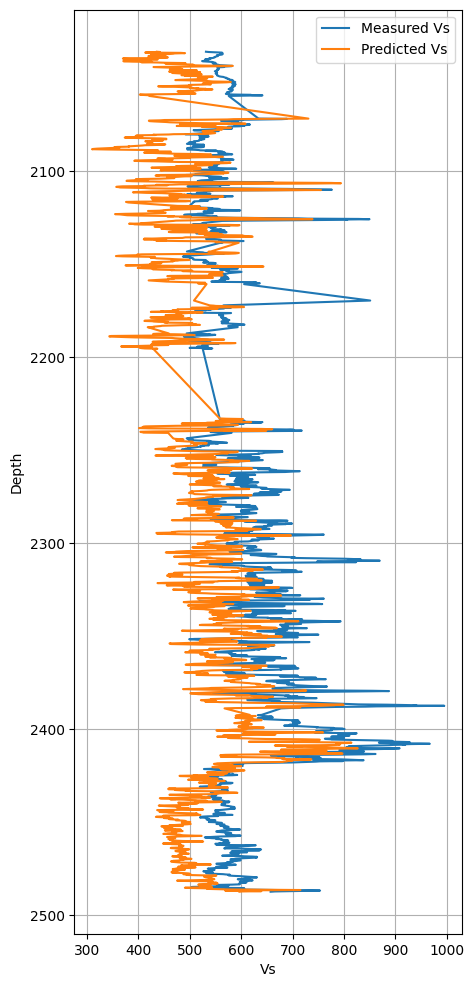

In [36]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_FF_4,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [37]:
y_pred_FF_4 = np.squeeze(y_pred_FF_4)

In [38]:
y_pred_FF_4

array([435.93045, 442.09042, 430.00998, ..., 639.2349 , 601.9157 ,
       596.6318 ], dtype=float32)

In [39]:
blind_meas = blind['Vs'].to_numpy()
blind_meas

array([531.48688353, 536.89287015, 552.15304387, ..., 686.56276733,
       665.54854998, 657.32909504])

In [40]:
print_evaluate(blind_meas, y_pred_FF_4)

MAE: 81.44527291647064
MSE: 8967.824389782822
RMSE: 94.69859761254557
R2 Square -0.42360132244886883
__________________________________


In [41]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_FF_4 / blind_meas
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_FF_4,blind_meas)

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 13.343825299577125
Pearson = 0.7648319971229489


In [43]:
DF = pd.DataFrame(y_pred_FF_4)
DF.to_csv("well_25_Vs_pred_FF4_T100_E3.csv")